<a href="https://colab.research.google.com/github/ming80302/COEXIST/blob/main/Copy_of_dispersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dispersion of P99 events

In [ ]:
!apt-get install -qq libgdal-dev libproj-dev
!pip uninstall shapely

Found existing installation: Shapely 1.8.1.post1
Uninstalling Shapely-1.8.1.post1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.8.1.post1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.8.1.post1


"Geometry must be a Point or LineString" problem related to  wrong version of shapely. Solve the problem
"pip uninstall shapely"  and then 
"pip install shapely --no-binary shapely"

In [ ]:

!pip install shapely --no-binary shapely
!pip install cartopy
import numpy as np
import pandas as pd

import csv
import datetime
import glob
from netCDF4 import Dataset
import sys, traceback
import dateutil.parser as dparser
import string
 
import mpl_toolkits
# from mpl_toolkits import basemap
import pickle
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mplPath

# Cluster specific modules

import sys
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from matplotlib.pyplot import figure

## 1) defination

In [ ]:
region_s = ["ColdNEPacific","WarmNEPacific","PacificNW","PacificSW", "Southwest", "Mezquital",       \
                "NRockies", "SRockies", "GreatBasin", "NPlains", "CPlains","SPlains", "Prairie",        \
                "GreatLakes", "Appalachia", "DeepSouth","Southeast","WarmNWAtlantic","MidAtlantic",     \
                "NorthAtlantic", "ColdNWAtlantic"]
n_region = len(region_s)

season_s = ["DJF", "MAM", "JJA", "SON"]
n_season = len(season_s)

In [ ]:
proj = ccrs.PlateCarree()

def ax_coastlines_country(ax_s):
    ax_s.coastlines(linewidths=0.5)
    ax_s.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='10m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.2))

In [ ]:
def plot_dsp(df):
  for col in range(n_season):
    for region in region_s[:n_region]:
        flnm_region = '/content/drive/MyDrive/data/region-masks/'+region+'.nc'
        
        ax_s = plt.subplot(2, 2, col+1, projection=ccrs.PlateCarree())
        ax_coastlines_country(ax_s)
        ax_s.add_feature(cfeature.STATES, linestyle=':')
        
        with xr.open_dataset(flnm_region) as ds_region:
            dsp=df[(df.region==region) & (df.tag==season_s[col])].dsp_events.values
            if region == region_s[0]:
                mask0=ds_region.mask
                # series -> scalar
                mask0=xr.where(mask0.values==1, dsp, mask0)
                print(season_s[col], dsp)
            else:
                mask1=ds_region.mask
                mask0=xr.where(mask1.values==1, dsp, mask0)
                #print(dsp)
   
        ax_coastlines_country(ax_s)
  
        im=mask0.plot.contourf(cmap='YlOrBr',
            levels=np.linspace(0, 5, num=11),
            ax=ax_s,               
            transform=proj, add_colorbar=False)

        plt.title(season_s[col],fontweight="bold", size=15)
        # zorder: parameter to specify the drawing order. Lower zorders will be drawn first  
        ax_s.add_feature(cfeature.OCEAN, zorder=10,color='lightgray')
        ax_s.add_feature(cfeature.STATES, linestyle=':')

        ax_s.set_extent([-128, -68, 25.3, 48])

  plt.tight_layout()

  # The position of the bottom edge of the subplots, as a fraction of the figure height.
  fig.subplots_adjust(bottom=0.15)
    
  # The position of the bottom edge of the subplots, as a fraction of the figure height.cbar_ax = fig.add_axes([0.16, 0.12, 0.7, 0.04])        
  #rect [left, bottom, width, height]
  cbar_ax = fig.add_axes([0.2, 0.12, 0.7, 0.03])
  fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
 

  plt.show()


## 2) Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

flnm_era5='/content/drive/MyDrive/data/ERA5_p99_daily_prepAvgVarDsp_2d.txt'
flnm_MPASU='/content/drive/MyDrive/data/MPAS_U_p99_daily_prepAvgVarDsp_2d.txt'
flnm_MPASV='/content/drive/MyDrive/data/MPAS_V_p99_daily_prepAvgVarDsp_2d.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3) Dispersion of ERA5

DJF [0.720539]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


MAM [0.464115]
JJA [0.764706]
SON [0.373737]


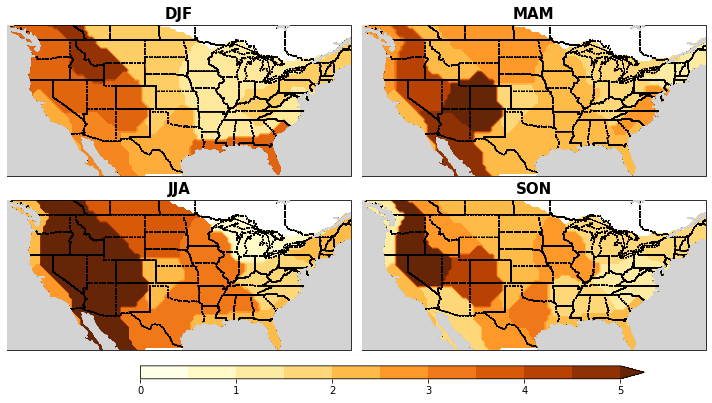

In [ ]:
df = pd.read_csv(flnm_era5)
fig = plt.figure(figsize=(10,6))
plot_dsp(df)

## 4) Dispersion of Unified Mesh MPAS

DJF [1.55592]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


MAM [0.709677]
JJA [2.49941]
SON [2.24444]


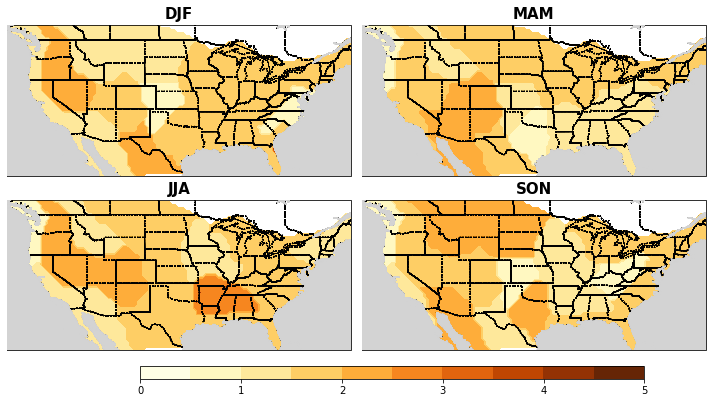

In [ ]:
df = pd.read_csv(flnm_MPASU)
fig = plt.figure(figsize=(10,6))
plot_dsp(df)

## 5) despersion of Verified Mesh MPAS

DJF [1.76337]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


MAM [1.02936]
JJA [2.59201]
SON [1.12458]


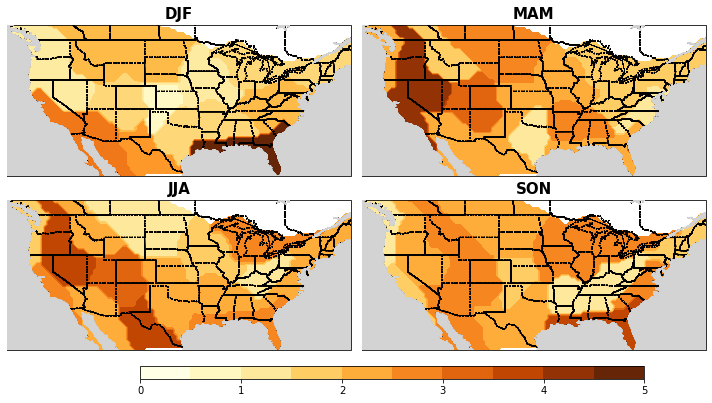

In [ ]:
df = pd.read_csv(flnm_MPASV)
fig = plt.figure(figsize=(10,6))
plot_dsp(df)